In [1]:
# %load ./import.py
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
!ls ./Data

Baseball96.xlsx  Countryregion.xlsx  Grocery.xlsx  USmacrodata.xls
Cardata.xlsx	 Fizzy.xlsx	     Oreos.xlsx


In [2]:
from ols_diag import ols_diag

### 7.       The file USmacrodata.xlsx contains U.S. quarterly GNP, Inflation rates, and Unemployment rates. Use this file to perform the following exercises:
 
 a. Develop a regression to predict quarterly GNP growth from the last four quarters of growth. Check for non-normality of residuals, heteroscedasticity, autocorrelation, and multicollinearity.
 
 b. Develop a regression to predict quarterly inflation rate from the last four quarters of inflation. Check for non-normality of residuals, heteroscedasticity, autocorrelation, and multicollinearity.
 
 c. Develop a regression to predict quarterly unemployment rate from the unemployment rates of the last four quarters. Check for non-normality of residuals, heteroscedasticity, autocorrelation, and multicollinearity.

In [3]:
us=pd.read_excel("./Data/USmacrodata.xls", header=None)
us=us.T
us=us[2:]
us.columns=us.iloc[0]
us=us[1:]
us.head()

2,Scale,GNP Billions,Unempoyment Rate,Inflation
3,1970 Q1,1017.1,4.5,6.18397
4,1970 Q2,1033.1,4.66667,6.04765
5,1970 Q3,1050.5,5.16667,5.72117
6,1970 Q4,1052.7,5.4,5.64301
7,1971 Q1,1098.1,6.5,4.88733


In [4]:
us.columns

Index(['Scale', 'GNP Billions', 'Unempoyment Rate', 'Inflation'], dtype='object', name=2)

In [5]:
us.columns=['Time', 'GNP', 'UR', 'I']
us.columns

Index(['Time', 'GNP', 'UR', 'I'], dtype='object')

In [6]:
for col in us.columns[1:]:
    for p in range(1,5):
        col_name=str(col)+"_"+str(p)
        us[col_name]=us[col].shift(periods=p, freq=None, axis=0)

us.head()

,Time,GNP,UR,I,GNP_1,GNP_2,GNP_3,GNP_4,UR_1,UR_2,UR_3,UR_4,I_1,I_2,I_3,I_4
3,1970 Q1,1017.1,4.5,6.18397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970 Q2,1033.1,4.66667,6.04765,1017.1,NaN,NaN,NaN,4.5,NaN,NaN,NaN,6.18397,NaN,NaN,NaN
5,1970 Q3,1050.5,5.16667,5.72117,1033.1,1017.1,NaN,NaN,4.66667,4.5,NaN,NaN,6.04765,6.18397,NaN,NaN
6,1970 Q4,1052.7,5.4,5.64301,1050.5,1033.1,1017.1,NaN,5.16667,4.66667,4.5,NaN,5.72117,6.04765,6.18397,NaN
7,1971 Q1,1098.1,6.5,4.88733,1052.7,1050.5,1033.1,1017.1,5.4,5.16667,4.66667,4.5,5.64301,5.72117,6.04765,6.18397


#### Trimming down NaNs

In [7]:
us=us.dropna()
us.head()

,Time,GNP,UR,I,GNP_1,GNP_2,GNP_3,GNP_4,UR_1,UR_2,UR_3,UR_4,I_1,I_2,I_3,I_4
7,1971 Q1,1098.1,6.5,4.88733,1052.7,1050.5,1033.1,1017.1,5.4,5.16667,4.66667,4.5,5.64301,5.72117,6.04765,6.18397
8,1971 Q2,1118.8,5.83333,4.40668,1098.1,1052.7,1050.5,1033.1,6.5,5.4,5.16667,4.66667,4.88733,5.64301,5.72117,6.04765
9,1971 Q3,1139.1,5.96667,4.27229,1118.8,1098.1,1052.7,1050.5,5.83333,6.5,5.4,5.16667,4.40668,4.88733,5.64301,5.72117
10,1971 Q4,1151.4,5.53333,3.48608,1139.1,1118.8,1098.1,1052.7,5.96667,5.83333,6.5,5.4,4.27229,4.40668,4.88733,5.64301
11,1972 Q1,1190.1,6.33333,3.51563,1151.4,1139.1,1118.8,1098.1,5.53333,5.96667,5.83333,6.5,3.48608,4.27229,4.40668,4.88733


#### Creating model retriver fucntion so that we can resue in each question

In [8]:
def model_retriver(factor):
    y_cols=[factor]
    X_cols=[]
    all_cols=[factor]

    for i in range(1,5): 
        col_name=str(factor)+"_"+str(i)
        X_cols.append(col_name)
        all_cols.append(col_name)

    df=us[all_cols]
    y_7=us[y_cols]
    X_7=us[X_cols]
    X_7=sm.add_constant(X_7)
    model_7=sm.OLS(y_7.astype(float), X_7.astype(float)).fit()
#     model_7=0
    return df, model_7, X_7

#### a. Develop a regression to predict quarterly GNP growth from the last four quarters of growth. Check for non-normality of residuals, heteroscedasticity, autocorrelation, and multicollinearity.

In [9]:
gn,model_7, X_7=model_retriver("GNP")
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GNP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.136e+05
Date:                Tue, 30 Apr 2019   Prob (F-statistic):          2.28e-310
Time:                        03:53:09   Log-Likelihood:                -878.34
No. Observations:                 165   AIC:                             1767.
Df Residuals:                     160   BIC:                             1782.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4898      7.959      2.574      0.011       4.772      36.208
GNP_1          1.5492      0.078     19.766      0.000       1.394       1.704
GNP_2         -0.3959      0.144     -2.754      0.007      -0.680      -0.112
GNP_3         -0.2743      0.144     -1.907      0.058      -0.558       0.010
GNP_4          0.1235      0.079      1.566      0.119      -0.032       0.279
==============================================================================
Omnibus:                      131.516   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2708.456
Skew:                          -2.598   Prob(JB):                         0.00
Kurtosis:                      22.156   Cond. No.                     3.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dataset: 	 165
X: 	 165
1. Normality Test:  Jarque-Bera Test
-----------------------------------------------
Warning
Reason: Residual Not Normally distributed
-----------------------------------------------


2. Linearity Test:  Rainbow Test
-----------------------------------------------
Warning
Reason: Data do not have linear relationship
-----------------------------------------------


3. Heteroscedasticity Test:  Breusch-Pagan Test
-----------------------------------------------
Warning
Reason: Data do not have have same variance accross
-----------------------------------------------


4. Autocorrelation Test:  Breusch Godfrey Test
-----------------------------------------------
Good
Reason: Data are not related to themself:1 lag
-----------------------------------------------


5. Sum of residuals == 0
-----------------------------------------------
Good
Reason: Sum of residuals = 0
-----------------------------------------------


6. Checking outliers:
-------------------------

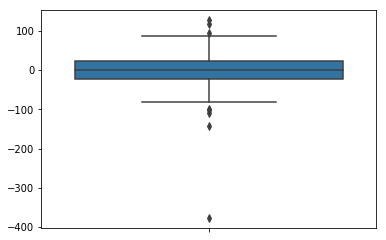

-----------------------------------------------



7. Checking multicolinearity
-----------------------------------------------


<Figure size 432x288 with 0 Axes>

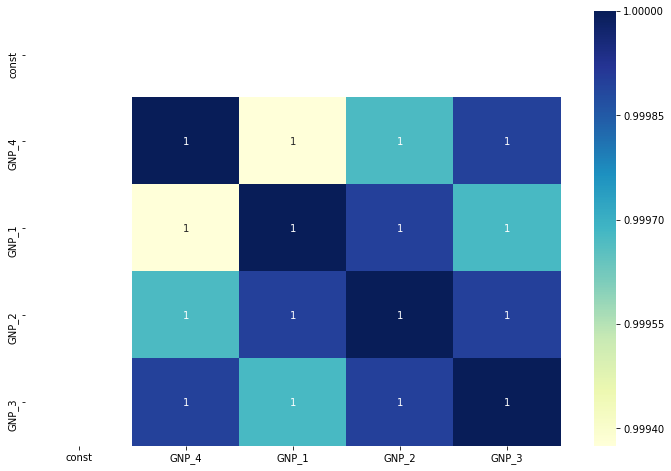

-----------------------------------------------


<Figure size 432x288 with 0 Axes>

In [10]:
ols_diag(gn,X_7,model_7)

#### Ans a: 
* From above check we conclude that:


1. Residuals are not normal.
2. Heteroscedasticity is present
3. Autocorrelation is not present
4. High Multicollinearity is present

* We can thus not conclude on our model.

#### b. Develop a regression to predict quarterly inflation rate from the last four quarters of inflation. Check for non-normality of residuals, heteroscedasticity, autocorrelation, and multicollinearity.
 

In [11]:
I,model_7, X_7=model_retriver("I")
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      I   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     656.8
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           3.99e-98
Time:                        03:53:10   Log-Likelihood:                -179.72
No. Observations:                 165   AIC:                             369.4
Df Residuals:                     160   BIC:                             385.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2554      0.105      2.422      0.017       0.047       0.464
I_1            1.3492      0.078     17.213      0.000       1.194       1.504
I_2           -0.4223      0.132     -3.203      0.002      -0.683      -0.162
I_3            0.1483      0.132      1.122      0.263      -0.113       0.409
I_4           -0.1349      0.079     -1.718      0.088      -0.290       0.020
==============================================================================
Omnibus:                       35.016   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.047
Skew:                          -0.331   Prob(JB):                     5.75e-67
Kurtosis:                       9.628   Cond. No.                         34.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dataset: 	 165
X: 	 165
1. Normality Test:  Jarque-Bera Test
-----------------------------------------------
Warning
Reason: Residual Not Normally distributed
-----------------------------------------------


2. Linearity Test:  Rainbow Test
-----------------------------------------------
Warning
Reason: Data do not have linear relationship
-----------------------------------------------


3. Heteroscedasticity Test:  Breusch-Pagan Test
-----------------------------------------------
Good
Reason: Data have same variance accross
-----------------------------------------------


4. Autocorrelation Test:  Breusch Godfrey Test
-----------------------------------------------
Warning
Reason: Data are related to themself by:1 lag
-----------------------------------------------


5. Sum of residuals == 0
-----------------------------------------------
Good
Reason: Sum of residuals = 0
-----------------------------------------------


6. Checking outliers:
--------------------------------------

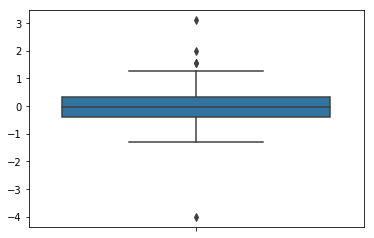

-----------------------------------------------



7. Checking multicolinearity
-----------------------------------------------


<Figure size 432x288 with 0 Axes>

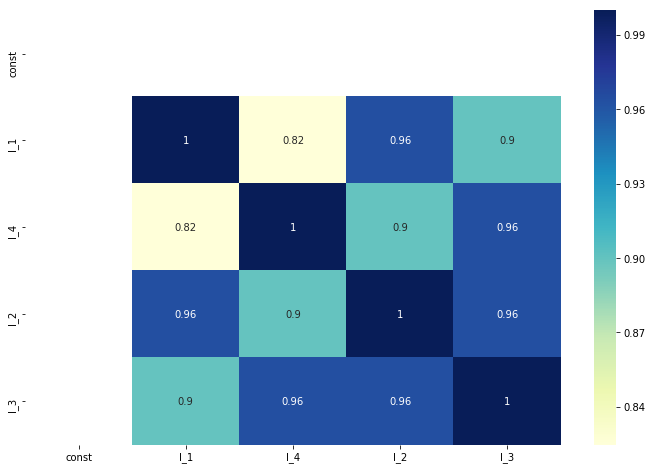

-----------------------------------------------


<Figure size 432x288 with 0 Axes>

In [12]:
ols_diag(I,X_7,model_7)

#### Ans b: 
* From above check we conclude that: 


1. Residuals are not normal.
2. Heteroscedasticity is not present
3. Autocorrelation is present
4. High Multicollinearity is present.


* We can thus not conclude on our model.

 #### c. Develop a regression to predict quarterly unemployment rate from the unemployment rates of the last four quarters. Check for non-normality of residuals, heteroscedasticity, autocorrelation, and multicollinearity.

In [13]:
UR,model_7, X_7=model_retriver("UR")
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     UR   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     265.2
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           1.77e-69
Time:                        03:53:10   Log-Likelihood:                -143.67
No. Observations:                 165   AIC:                             297.3
Df Residuals:                     160   BIC:                             312.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3881      0.200      1.941      0.054      -0.007       0.783
UR_1           0.8543      0.077     11.157      0.000       0.703       1.005
UR_2           0.3211      0.095      3.386      0.001       0.134       0.508
UR_3          -0.4881      0.095     -5.134      0.000      -0.676      -0.300
UR_4           0.2554      0.077      3.315      0.001       0.103       0.408
==============================================================================
Omnibus:                       42.044   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.121
Skew:                           1.171   Prob(JB):                     8.92e-19
Kurtosis:                       5.569   Cond. No.                         57.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dataset: 	 165
X: 	 165
1. Normality Test:  Jarque-Bera Test
-----------------------------------------------
Warning
Reason: Residual Not Normally distributed
-----------------------------------------------


2. Linearity Test:  Rainbow Test
-----------------------------------------------
Good
Reason: Data have linear relationship
-----------------------------------------------


3. Heteroscedasticity Test:  Breusch-Pagan Test
-----------------------------------------------
Warning
Reason: Data do not have have same variance accross
-----------------------------------------------


4. Autocorrelation Test:  Breusch Godfrey Test
-----------------------------------------------
Warning
Reason: Data are related to themself by:1 lag
-----------------------------------------------


5. Sum of residuals == 0
-----------------------------------------------
Good
Reason: Sum of residuals = 0
-----------------------------------------------


6. Checking outliers:
---------------------------------

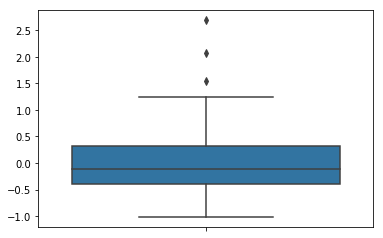

-----------------------------------------------



7. Checking multicolinearity
-----------------------------------------------


<Figure size 432x288 with 0 Axes>

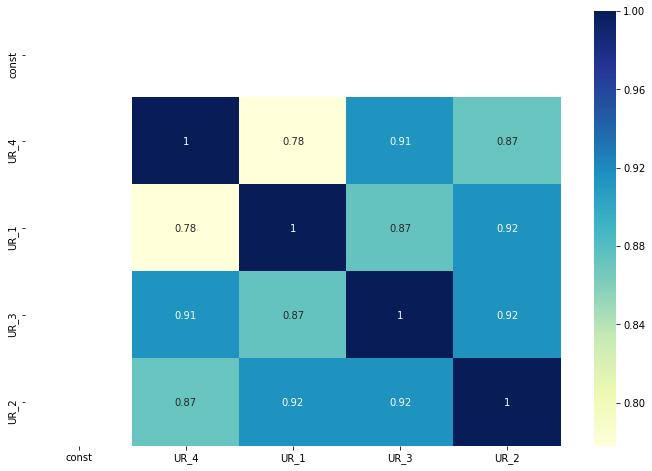

-----------------------------------------------


<Figure size 432x288 with 0 Axes>

In [14]:
ols_diag(UR,X_7,model_7)

#### Ans c: 
* From above check we conclude that 
1. Residuals are not normal
2. Heteroscedasticity is present
3. Autocorrelation is present
4. High multicollinearity is present


* We can thus not conclude on our model.